In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv('Filtered_Indian_Languages.csv')

**Step 1: Load and Prepare the Dataset**

In [2]:
# printing starting 10 rows

df.head(10)

,Text,Language
0,ഭൗതികപ്രപഞ്ചത്തെ മൊത്തത്തിൽ സൂചിപ്പിക്കുന്ന പദ...,Malayalam
1,ഭൗതികപ്രതിഭാസങ്ങളും ജീവനും പ്രകൃതിയുടെ ഘടകങ്ങള...,Malayalam
2,മനുഷ്യനിർമിതമായ വസ്തുക്കളെ പ്രകൃതിയുടെ ഭാഗമായി...,Malayalam
3,അവയെ കൃത്രിമം എന്ന് വിശേഷിപ്പിക്കുന്നുഅഭിപ്രായ...,Malayalam
4,പ്രകൃതി എന്ന പദം പ്രപഞ്ചത്തെയും അതിലെ സമസ്ത പ്...,Malayalam
5,അറിയപ്പെടുന്ന ഗ്രഹങ്ങളിൽ ജീവൻ നിലനിൽക്കുന്നതായ...,Malayalam
6,സൗരയൂഥത്തിൽ സൂര്യനിൽ നിന്ന് മൂന്നാം സ്ഥാനമാണ് ...,Malayalam
7,പ്രപഞ്ചത്തിലെ വസ്തുക്കളുടെ അന്തരീക്ഷത്തിന് പുറ...,Malayalam
8,ദർശനം ശാസ്ത്രം ==കുറിപ്പുകളും അവലംബങ്ങളും==ഉരു...,Malayalam
9,Atmospheric sciences ·\nപരിതഃസ്ഥിതിക ശാസ്ത്രം ...,Malayalam


In [3]:
df['Language'].unique()

array(['Malayalam', 'Hindi', 'Tamil', 'Kannada'], dtype=object)

In [4]:
df.shape

(1495, 2)

In [5]:
# Extract features and labels

X = df['Text']
y = df['Language']

# Convert the target labels to numerical values using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2)

**Step 2: Vectorize the Text Data**

In [6]:
# Use TfidfVectorizer to transform text into numerical format
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


**Gaussian Naive Bayes**

In [7]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Convert sparse matrix to dense as GaussianNB expects dense input
X_train_dense = X_train_tfidf.toarray()
X_test_dense = X_test_tfidf.toarray()

# Initialize Gaussian Naive Bayes
gnb = GaussianNB()

# Train the model
gnb.fit(X_train_dense, y_train)

# Make predictions
y_pred_gnb = gnb.predict(X_test_dense)

# Calculate accuracy
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print(f"Gaussian Naive Bayes Accuracy: {accuracy_gnb}")


Gaussian Naive Bayes Accuracy: 0.9832775919732442


**(b) Multinomial Naive Bayes**

- Multinomial Naive Bayes is better suited for discrete data like word counts or frequencies.

In [8]:
from sklearn.naive_bayes import MultinomialNB

# Initialize Multinomial Naive Bayes
mnb = MultinomialNB()

# Train the model
mnb.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_mnb = mnb.predict(X_test_tfidf)

# Calculate accuracy
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
print(f"Multinomial Naive Bayes Accuracy: {accuracy_mnb}")


Multinomial Naive Bayes Accuracy: 0.9732441471571907


In [9]:
print(f"Gaussian NB Accuracy: {accuracy_gnb}")
print(f"Multinomial NB Accuracy: {accuracy_mnb}")


Gaussian NB Accuracy: 0.9832775919732442
Multinomial NB Accuracy: 0.9732441471571907


**CNN**

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense

# Load the dataset
data = pd.read_csv('Filtered_Indian_Languages.csv')

# Prepare the data
X = data['Text'].values  # Input text data
y = data['Language'].values  # Language labels

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure uniform input length
max_len = 100  # Maximum sequence length
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Build CNN model
cnn_model = Sequential()
cnn_model.add(Embedding(input_dim=5000, output_dim=128, input_length=max_len))
cnn_model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
cnn_model.fit(X_train_pad, y_train, epochs=5, validation_split=0.2)

# Evaluate CNN model
cnn_accuracy = cnn_model.evaluate(X_test_pad, y_test, verbose=0)[1]
print(f'CNN Accuracy: {cnn_accuracy * 100:.2f}%')


Epoch 1/5


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.4584 - loss: 1.2623 - val_accuracy: 0.6750 - val_loss: 1.0614
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7489 - loss: 0.7983 - val_accuracy: 0.9083 - val_loss: 0.3685
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9624 - loss: 0.2010 - val_accuracy: 0.9417 - val_loss: 0.1470
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9873 - loss: 0.0695 - val_accuracy: 0.9667 - val_loss: 0.0843
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9941 - loss: 0.0306 - val_accuracy: 0.9750 - val_loss: 0.0649
CNN Accuracy: 97.32%


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


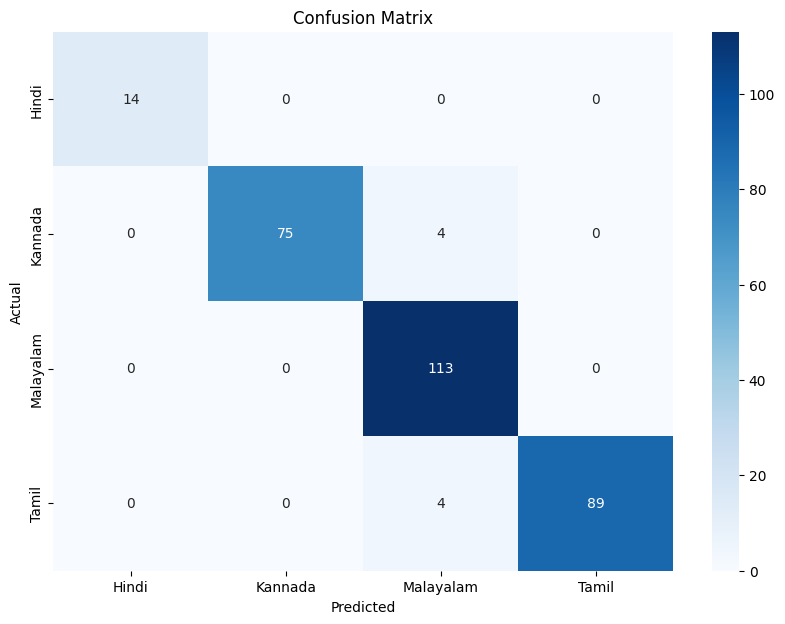

              precision    recall  f1-score   support

       Hindi       1.00      1.00      1.00        14
     Kannada       1.00      0.95      0.97        79
   Malayalam       0.93      1.00      0.97       113
       Tamil       1.00      0.96      0.98        93

    accuracy                           0.97       299
   macro avg       0.98      0.98      0.98       299
weighted avg       0.98      0.97      0.97       299



In [11]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = cnn_model.predict(X_test_pad)
y_pred_labels = np.argmax(y_pred, axis=1)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_labels)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Classification report for more metrics
print(classification_report(y_test, y_pred_labels, target_names=label_encoder.classes_))


In [12]:
def predict_language(input_text):
    # Convert the input text to a sequence of integers
    input_seq = tokenizer.texts_to_sequences([input_text])

    # Pad the sequence to match the input shape of the model
    input_pad = pad_sequences(input_seq, maxlen=max_len)

    # Get the prediction from the model
    prediction = cnn_model.predict(input_pad)

    # Get the predicted label (class)
    predicted_label = np.argmax(prediction, axis=1)

    # Map the predicted label back to the original language
    predicted_language = label_encoder.inverse_transform(predicted_label)

    return predicted_language[0]

# Example usage 1
input_text = "என் இன்பம்."
predicted_language = predict_language(input_text)
print(f'Predicted Language: {predicted_language}')

# Example usage 2
input_text = "ഇല്ല, ഞാൻ അങ്ങനെ വിചാരിക്കുന്നില്ല."
predicted_language = predict_language(input_text)
print(f'Predicted Language: {predicted_language}')

# Example usage 3
input_text = "ನನಗೆ ತಿಳಿದಿಲ್ಲ ಎಂದು ನಾನು ಹೆದರುತ್ತೇನೆ"
predicted_language = predict_language(input_text)
print(f'Predicted Language: {predicted_language}')

# Example usage 4
input_text = "बहुत बहुत शुक्रिया। आप कैसे हैं?"
predicted_language = predict_language(input_text)
print(f'Predicted Language: {predicted_language}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted Language: Tamil
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted Language: Malayalam
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted Language: Kannada
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Language: Hindi


**LSTM**

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [14]:
# Load the dataset
df = pd.read_csv('Filtered_Indian_Languages.csv')

# Features and labels
X = df['Text']  # Text column containing the input sentences
y = df['Language']  # Language column containing the target languages

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)

# Padding the sequences to ensure uniform input size
max_seq_length = max([len(x) for x in X_seq])  # Determine the max sequence length
X_padded = pad_sequences(X_seq, maxlen=max_seq_length)

# Encoding the labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categorical = to_categorical(y_encoded)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_padded, y_categorical, test_size=0.2, random_state=42)


In [16]:
vocab_size = len(tokenizer.word_index) + 1  # Vocabulary size based on the tokenizer

model = Sequential()

# Embedding layer to convert tokens into dense vectors
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_seq_length))

# LSTM layer to capture sequential patterns
model.add(LSTM(128, return_sequences=False))

# Fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Add dropout to prevent overfitting

# Output layer (softmax for multiclass classification)
model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [124]:
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 688s 37s/step - accuracy: 0.3455 - loss: 1.3183 - val_accuracy: 0.3813 - val_loss: 1.1760
Epoch 2/10
 7/19 ━━━━━━━━━━━━━━━━━━━━ 9:53 49s/step - accuracy: 0.4287 - loss: 1.1573 

In [125]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.9522 - loss: 0.1093
Test Accuracy: 95.32%


**HMM**

In [143]:
%pip install numpy pandas hmmlearn


In [150]:
import pandas as pd

# Load the dataset
file_path = 'Filtered_Indian_Languages.csv'
data = pd.read_csv(file_path)

# Display the first few rows and structure of the dataset
data.head(), data.shape


(                                                Text   Language
 0  ഭൗതികപ്രപഞ്ചത്തെ മൊത്തത്തിൽ സൂചിപ്പിക്കുന്ന പദ...  Malayalam
 1  ഭൗതികപ്രതിഭാസങ്ങളും ജീവനും പ്രകൃതിയുടെ ഘടകങ്ങള...  Malayalam
 2  മനുഷ്യനിർമിതമായ വസ്തുക്കളെ പ്രകൃതിയുടെ ഭാഗമായി...  Malayalam
 3  അവയെ കൃത്രിമം എന്ന് വിശേഷിപ്പിക്കുന്നുഅഭിപ്രായ...  Malayalam
 4  പ്രകൃതി എന്ന പദം പ്രപഞ്ചത്തെയും അതിലെ സമസ്ത പ്...  Malayalam,
 (1495, 2))

In [151]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from hmmlearn import hmm



# Create a character-to-index mapping for the dataset
all_chars = sorted(list(set(''.join(data['Text']))))
char_to_index = {char: idx for idx, char in enumerate(all_chars)}

# Function to convert text sequences into numeric form
def text_to_numeric_sequence(text):
    return [char_to_index[char] for char in text if char in char_to_index]

# Apply the conversion to the dataset
data['Text_Numeric_Seq'] = data['Text'].apply(text_to_numeric_sequence)

# Label encode the language column
label_encoder = LabelEncoder()
data['Language_Encoded'] = label_encoder.fit_transform(data['Language'])

# Define max sequence length
max_seq_len = 100

# Padding or trimming sequences to 100 characters
X_padded_numeric = [seq[:max_seq_len] + [0]*(max_seq_len - len(seq)) if len(seq) < max_seq_len else seq[:max_seq_len] for seq in data['Text_Numeric_Seq']]
X_padded_numeric = np.array(X_padded_numeric)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_padded_numeric, data['Language_Encoded'], test_size=0.2, random_state=42)

# Ensure y_train and y_test are numpy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)

# Function to train HMM models for each language
def train_hmm(X_train, y_train, n_states=10):
    language_models = {}
    for label in np.unique(y_train):
        # Filter sequences for the current label
        sequences = X_train[y_train == label]

        # Ensure that we have enough sequences to train the model
        if len(sequences) == 0:
            continue

        # Prepare the data for fitting
        lengths = [len(seq) for seq in sequences]
        sequences = np.concatenate(sequences).reshape(-1, 1)

        # Create and fit the HMM model for the current language
        model = hmm.GaussianHMM(n_components=n_states, n_iter=1000, tol=0.01)  # Using GaussianHMM
        model.fit(sequences, lengths)

        language_models[label] = model
    return language_models

# Train the HMM model with the numeric sequences and matching training labels
language_models = train_hmm(X_train, y_train)

# Predict the language of a sample test sequence
def predict_language(language_models, sequence):
    best_score = float('-inf')
    best_label = None
    sequence = np.array(sequence).reshape(-1, 1)

    for label, model in language_models.items():
        try:
            score = model.score(sequence)
            if score > best_score:
                best_score = score
                best_label = label
        except:
            pass

    return best_label

# Calculate accuracy on the test set
def calculate_accuracy(language_models, X_test, y_test):
    correct_predictions = 0

    for i, sequence in enumerate(X_test):
        predicted_label = predict_language(language_models, sequence)

        if predicted_label == y_test[i]:  # Compare prediction with the actual label
            correct_predictions += 1

    # Calculate accuracy as the percentage of correct predictions
    accuracy = correct_predictions / len(y_test) * 100
    return accuracy

# Calculate accuracy on the test set
accuracy = calculate_accuracy(language_models, X_test, y_test)
print(f"Model Accuracy: {accuracy:.2f}%")


Model Accuracy: 99.67%


In [155]:
# Assuming you have already calculated the accuracies for the models
print(f'Naive Bayes Accuracy: {accuracy_gnb * 100:.2f}%')
print(f'CNN Accuracy: {cnn_accuracy * 100:.2f}%')
print(f'LSTM Accuracy: {test_accuracy * 100:.2f}%')
print(f'HMM Accuracy: {accuracy:.2f}%')



Naive Bayes Accuracy: 99.33%
CNN Accuracy: 96.66%
LSTM Accuracy: 95.32%
LSTM Accuracy: 99.67%
